In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


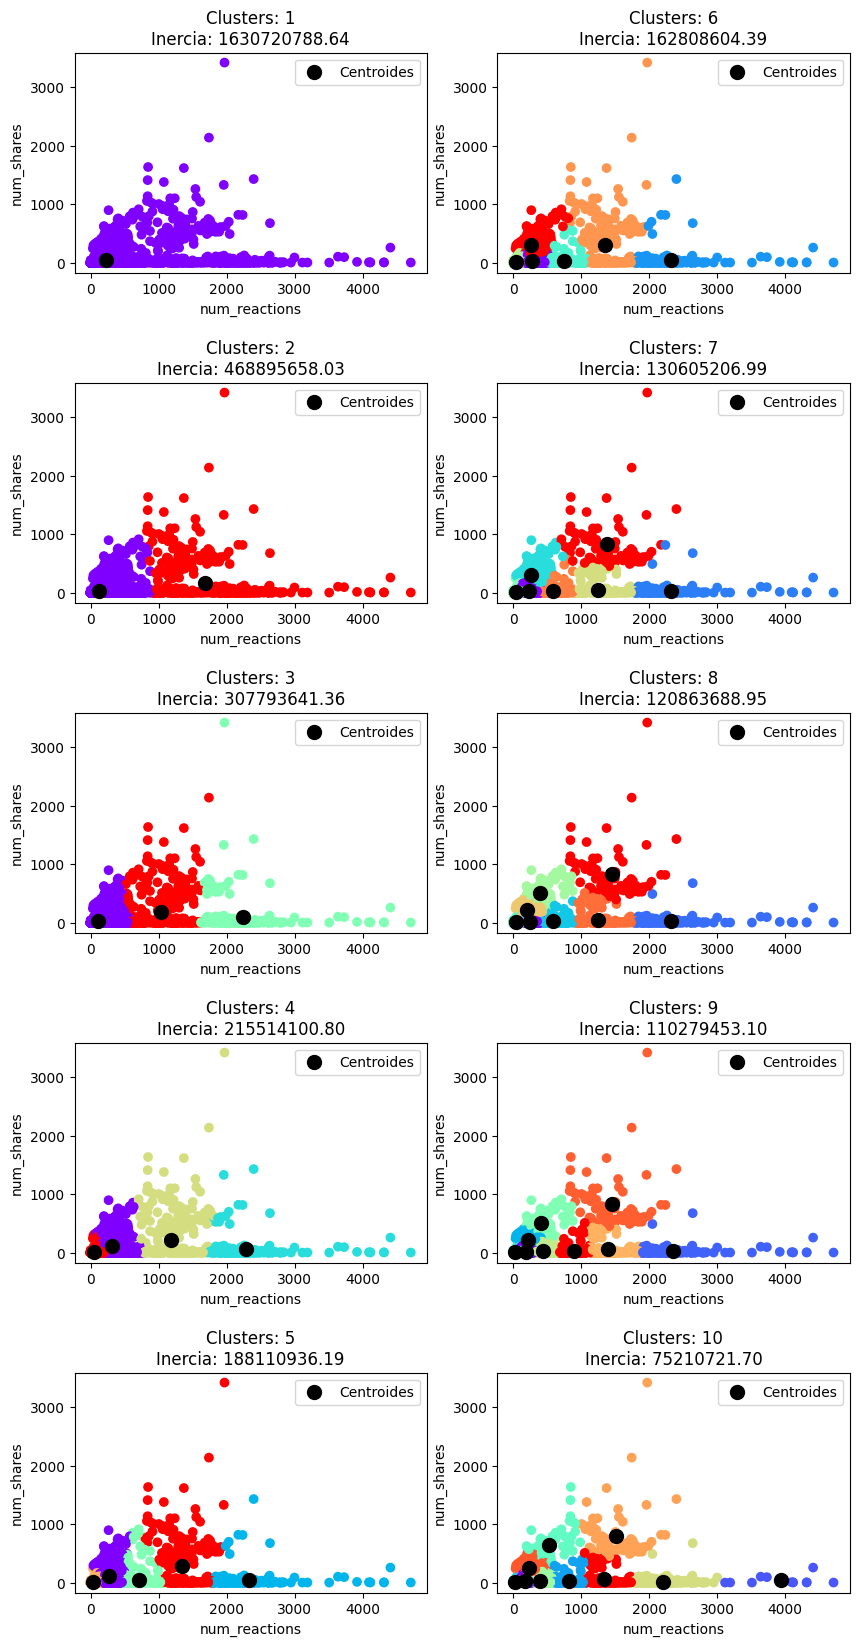

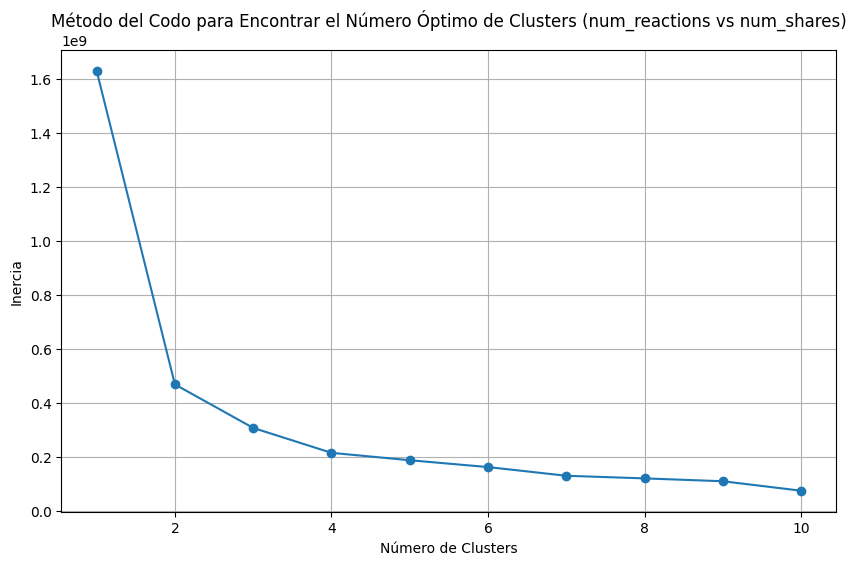

In [54]:
def K_Means(data, columns):
    X = data[columns].values

    max_clusters = 10
    inertia_values = []

    def calculate_distances(X, centroids):
        num_points = X.shape[0]
        num_clusters = centroids.shape[0]
        distances = np.zeros((num_points, num_clusters))
        
        for i in range(num_clusters):
            centroid = centroids[i]
            squared_distances = np.sum((X - centroid) ** 2, axis=1)
            distances[:, i] = np.sqrt(squared_distances)
        
        return distances

    def update_centroids(X, labels, num_clusters):
        new_centroids = np.zeros((num_clusters, X.shape[1]))
        for i in range(num_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
        return new_centroids

    def calculate_inertia(X, labels, centroids):
        inertia = 0
        for i in range(len(centroids)):
            cluster_points = X[labels == i]
            squared_distances = np.sum((cluster_points - centroids[i]) ** 2)
            inertia += squared_distances
        return inertia

    # subgráficos para las gráficas de agrupación
    fig, axs = plt.subplots(5, 2, figsize=(10, 20))
    fig.subplots_adjust(hspace=0.5)

    for num_clusters in range(1, max_clusters + 1):
        np.random.seed(0)
        centroids = X[np.random.choice(X.shape[0], num_clusters, replace=False)]
        max_iters = 100

        for _ in range(max_iters):
            distances = calculate_distances(X, centroids)
            labels = np.argmin(distances, axis=1)
            new_centroids = update_centroids(X, labels, num_clusters)

            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

        inertia = calculate_inertia(X, labels, centroids)
        inertia_values.append(inertia)

        row = (num_clusters - 1) % 5
        col = (num_clusters - 1) // 5
        inertia = calculate_inertia(X, labels, centroids)
        
        axs[row, col].scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
        axs[row, col].scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroides')
        axs[row, col].set_title(f'Clusters: {num_clusters}\nInercia: {inertia:.2f}')
        axs[row, col].legend()

    for ax in axs.flat:
        ax.set(xlabel=columns[0], ylabel=columns[1])
        
        # Elimina plots vacíos 
    for i in range(max_clusters, 10):
        fig.delaxes(axs.flatten()[i])

    # Crear gráfico del método del codo
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia_values, marker='o', linestyle='-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia')
    plt.title(f'Método del Codo para Encontrar el Número Óptimo de Clusters ({columns[0]} vs {columns[1]})')
    plt.grid(True)

    plt.show()

archivo_csv = 'live.csv'  
data = pd.read_csv(archivo_csv)
columnas_a_eliminar = ['Column1', 'Column2', 'Column3', 'Column4']
data = data.drop(columns=columnas_a_eliminar)

K_Means(data, columns=['num_reactions', 'num_shares'])